### T28 - Linear Regression,Ridge Regression and Lasso Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston

df = load_boston()
dataset = pd.DataFrame(df.data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
dataset.columns = df.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
dataset['Price'] = df.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = dataset.iloc[:,:-1] #Independent features
y = dataset.iloc[:,-1]  #Dependent Features

### Linear Regression

In [5]:
from sklearn.model_selection import cross_val_score ## Peforms cross validation
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse) #Nearer to zero

-37.13180746769914


### Ridge Regression

In ridge regression , we need to find value of Lamda , For that we use GridSearchCv

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.9057019475404


### Lasso Regression 

It performs well when you have many no of features

In [11]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.531580220694856


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

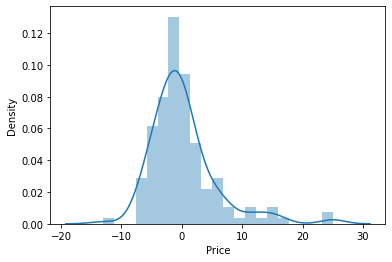

In [16]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso) #It plots value of difference 

<AxesSubplot:xlabel='Price', ylabel='Density'>

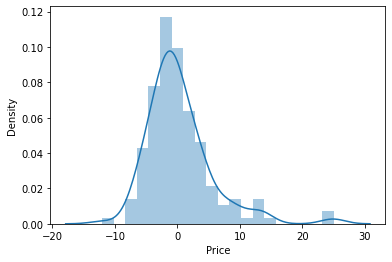

In [17]:
sns.distplot(y_test-prediction_ridge)

## T29 Multiple Linear Regression 

In [18]:
dataset  = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
states = pd.get_dummies(X['State'],drop_first=True)
X = X.drop('State',axis=1)
X = pd.concat([X,states],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score #R sqaured Nearer to 1 indicates good model
score = r2_score(y_test,y_pred)
score

0.9358680970046243

### T30 - Multicollinearity in Linear Regression

Multicollinearity - If your independent features are correlated more than 90%

Consider we have Two features - Age and Experience . Both of these Inpendent features have correlation - 90%

In [23]:
df_adv = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Multicollinearity/master/data/Advertising.csv',index_col=0)
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [25]:
X = df_adv.iloc[:,:-1]
y = df_adv.iloc[:,-1]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


#### ordinary Least Square Regression model

In [31]:
import statsmodels.api as sm
X = sm.add_constant(X)
X

,const,TV,radio,newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4
...,...,...,...,...
196,1.0,38.2,3.7,13.8
197,1.0,94.2,4.9,8.1
198,1.0,177.0,9.3,6.4
199,1.0,283.6,42.0,66.2


In [32]:
model = sm.OLS(y,X).fit()

In [33]:
### These will help us to find whether there is multi collinearity between Independent features

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        19:24:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Check Coeff value - less \
R sqaured - Good

In above we can seee that std_err is very less for each feature.These indicates that none of the feature above is having multicollinearity problem

In [36]:
X.iloc[:,1:].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


##### Now we will see multicollinearity example

In [39]:
df_salary = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Multicollinearity/master/data/Salary_Data.csv')
df_salary.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [40]:
X = df_salary.iloc[:,:-1]
y = df_salary.iloc[:,-1]

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.35e-19
Time:                        19:34:48   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6661.9872   2.28e+04     -0.292      0.773   -5.35e+04    4.02e+04
YearsExperience  6153.3533   2337.092      2.633      0.014    1358.037    1.09e+04
Age              1836.0136   1285.034      1.429      0.165    -800.659    4472.686
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.975
Skew:                           0.456   Prob(JB):                        0.372
Kurtosis:                       2.135   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

std_Err is very very high

Age p value is > 0.05

In [42]:
X.iloc[:,1:].corr() ## Age and Experience is having 98% correlation,We will remove one feature 

## Drop age because it is having High p value which is > 0.05

,YearsExperience,Age
YearsExperience,1.000000,0.987258
Age,0.987258,1.000000


### P value , T test ,  Correlation in python

#### T Test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

Comparison is done on Sample and Population 

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

#### One Sample T test 

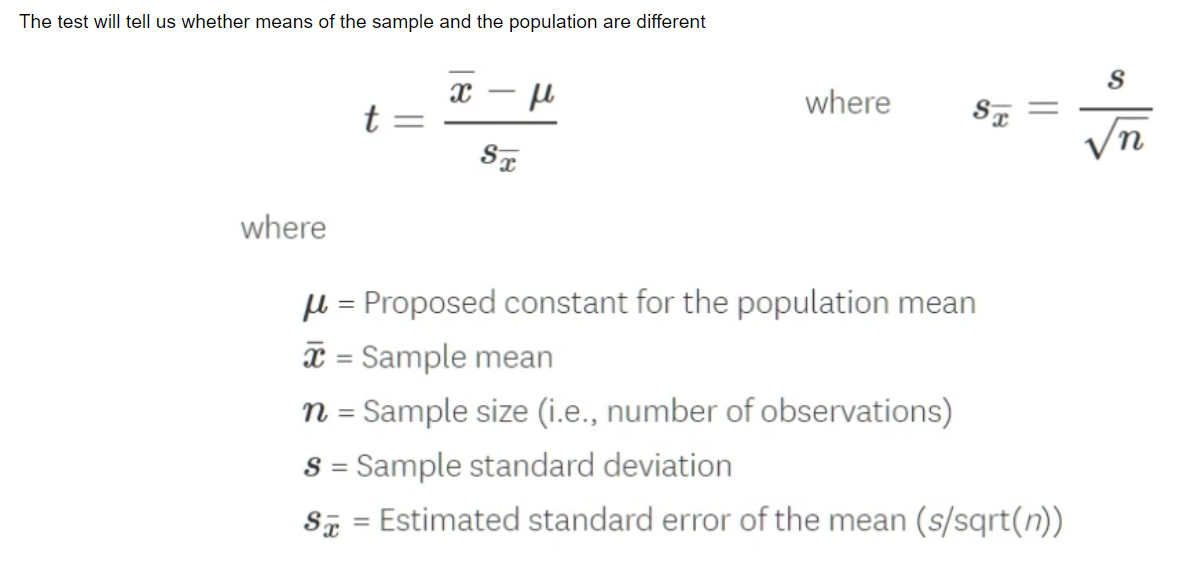

In [1]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
print(len(ages))

32


In [2]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [3]:
## Lets take sample

sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

#H1 - There is difference 
#H0 - There is no difference

array([18, 16, 27, 19, 20, 18, 32, 35, 43, 32])

In [9]:
age_sample.mean()

26.0

In [4]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(age_sample,30)### Population Mean - Expected value in null hypothesis
print(p_value)

0.20085956224003138


In [5]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


### More Examples

Consider age of students in college and in Class A



In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500) #Starts Height from 18,Mean-35,Population size -1500
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)#Starts Height from 18,Mean-30,Sample size -60
classA_ages.mean()

46.9

In [7]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())
p_value

1.139027071016194e-13

In [10]:
school_ages.mean()

53.303333333333335

In [8]:
#H1 - There is difference 
#H0 - There is no difference

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python

The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

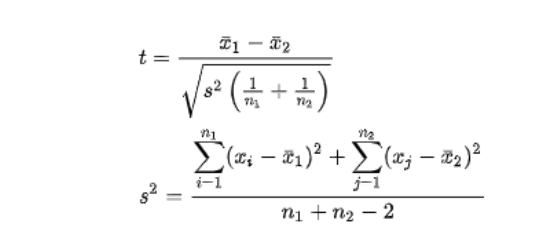

In [11]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [13]:
_,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)
p_value

0.00039942095100859375

In [14]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [15]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[30.57926457 34.91022437 29.00444617 30.54295091 19.86201983 37.57873174
 18.3299827  21.3771395  36.36420881 32.05941216 26.93827982 29.519014
 26.42851213 30.50667769 41.32984284]


In [16]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})
weight_df

,weight_10,weight_20,weight_change
0,25,30.579265,5.579265
1,30,34.910224,4.910224
2,28,29.004446,1.004446
3,35,30.542951,-4.457049
4,28,19.862020,-8.137980
5,34,37.578732,3.578732
6,26,18.329983,-7.670017
7,29,21.377139,-7.622861
8,30,36.364209,6.364209
9,26,32.059412,6.059412


In [17]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)
p_value

0.5732936534411279

In [18]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


### Correlation



In [20]:
import seaborn as sns
df = sns.load_dataset('iris')
df.shape

(150, 5)

In [21]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


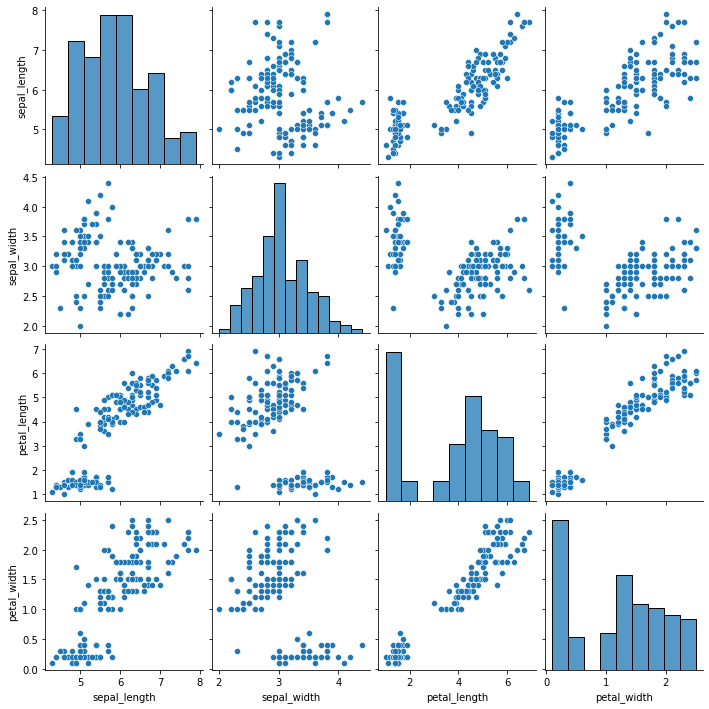

In [22]:
sns.pairplot(df)

## Chi-Square Test- 

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [23]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset('tips')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

dataset_table.values

smoker  Yes  No
sex            
Male     60  97
Female   33  54


array([[60, 97],
       [33, 54]], dtype=int64)

In [26]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [27]:
val=stats.chi2_contingency(dataset_table)
val  # Array is having Expected value

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [29]:
## There is small difference between Observed value and Expected value
Expected_Values=val[3]
Expected_Values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [30]:
no_of_rows=len(dataset_table.iloc[0:2,0]) # See in Smoker and Sex matrix
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1) #Degree of Freedom
print("Degree of Freedom:-",ddof)
alpha = 0.05 #95% VARIANCE we can capture between features

Degree of Freedom:- 1


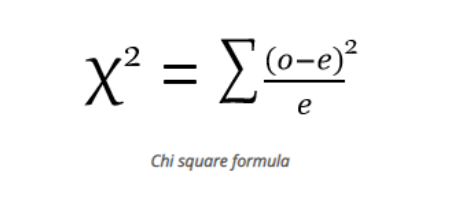

In [31]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [32]:
critical_value=chi2.ppf(q=1-alpha,df=ddof) #Percent point function(inverse of cdf) pvalue=alpha
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [33]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [34]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
### you can select anyone approach from above 

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.


For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not 


In [35]:
import seaborn as sns
df1=sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
df_anova = df1[['petal_width','species']]
grps = pd.unique(df_anova.species.values)
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
df_anova['petal_width'][df_anova.species == 'setosa']

0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
5     0.4
6     0.3
7     0.2
8     0.2
9     0.1
10    0.2
11    0.2
12    0.1
13    0.1
14    0.2
15    0.4
16    0.4
17    0.3
18    0.3
19    0.3
20    0.2
21    0.4
22    0.2
23    0.5
24    0.2
25    0.2
26    0.4
27    0.2
28    0.2
29    0.2
30    0.2
31    0.4
32    0.1
33    0.2
34    0.2
35    0.2
36    0.2
37    0.1
38    0.2
39    0.2
40    0.3
41    0.3
42    0.2
43    0.6
44    0.4
45    0.3
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal_width, dtype: float64

In [39]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [40]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])
print(p)

4.169445839443116e-85


In [41]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
